# Time Series Analysis - Influence of birds on the direction 

---


# Data - Creating a simulation 

## Importing libraries and modules 

In [2]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils


## Launching a simulation

In [3]:
N = 50
L = 10
radius = 1 

In [4]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1, speed=0.3)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

In [5]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_45,theta_y_45,theta_x_46,theta_y_46,theta_x_47,theta_y_47,theta_x_48,theta_y_48,theta_x_49,theta_y_49
0,0.000000,3.475747,9.358856,8.186952,1.369785,0.145029,1.257668,0.484375,7.663771,8.697239,...,-0.932580,-0.360962,-0.943677,-0.330868,-0.926536,0.376206,0.945093,0.326802,0.999982,-0.005934
1,0.333333,3.434693,9.450040,8.124571,1.447943,0.045183,1.252115,0.511620,7.567554,8.745155,...,-0.932236,-0.361851,-0.888506,-0.458864,-0.731338,0.682015,0.998752,0.049936,0.999662,-0.025996
2,0.666667,3.401833,9.544488,8.073564,1.533956,9.945184,1.251762,0.593023,7.509473,8.802032,...,-0.999573,-0.029211,-0.886835,-0.462087,-0.759073,0.651005,0.999790,-0.020504,0.997976,-0.063595
3,1.000000,3.368518,9.638775,8.042801,1.629106,9.846180,1.265843,0.672447,7.448713,8.823197,...,-1.000000,-0.000518,-0.919289,0.393583,-0.386360,0.922348,0.990714,-0.135963,0.999398,0.034694
4,1.333333,3.306092,9.716897,8.013474,1.724709,9.746188,1.267120,0.747854,7.383033,8.849542,...,-0.976855,-0.213901,-0.539328,0.842096,-0.477070,0.878865,0.996199,-0.087104,0.973717,-0.227759


In [6]:
df_labels = df_labels = utils.clusters_over_time(df,
                                                  func=utils.periodic_clustering_labels_pos_ang,
                                                    k_coef=1.5, L=L, delta_theta = 0.5, min_samples=5)
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,0,-1,0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,0,-1,0,-1,-1,-1,-1,-1,-1
2,0,-1,-1,-1,-1,-1,-1,0,-1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,0,-1,-1,-1,-1,-1,-1,0,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,-1
4,0,1,1,-1,1,-1,-1,0,-1,-1,...,-1,2,0,2,-1,-1,2,1,-1,-1


In [9]:
df_optimal = utils.correct_labels_optimal_assignment(df_labels, df, "contribution", L)
df_optimal.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,0,-1,0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,0,-1,0,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,0,-1,0,-1,-1,-1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,0,-1,0,-1,-1,0,-1,-1,-1
4,1,3,3,-1,3,-1,-1,1,-1,-1,...,-1,0,1,0,-1,-1,0,3,-1,-1


# Life span analysis 

## Cluster Life span - Visualisation and categorization

In [10]:
life_span_max, life_span_all = utils.life_span(df_optimal)
print("Life span for optimal labels")
print(life_span_max)
print(life_span_all)
life_span_max, life_span_all = utils.life_span(df_labels)
print("Life span for periodic clustering labels")
print(life_span_max)
print(life_span_all)

Life span for optimal labels
[ 40.  31.   2.  90. 211.   1.  41.   1.   1.   1.  78.  15. 207.  94.
 234. 491. 206.   5.   5.  24.]
[[40.0], [31.0], [2.0], [90.0], [211.0], [1.0], [41.0], [1.0], [1.0], [1.0], [78.0], [15.0], [207.0], [94.0], [234.0], [491.0], [206.0], [5.0], [5.0], [24.0]]
Life span for periodic clustering labels
[1.001e+03 2.240e+02 5.000e+01 3.400e+01 1.900e+01 1.000e+00]
[[1001.0], [94.0, 10.0, 1.0, 1.0, 94.0, 5.0, 224.0, 206.0, 24.0], [50.0, 1.0, 1.0, 5.0, 5.0], [1.0, 34.0], [1.0, 19.0], [1.0]]


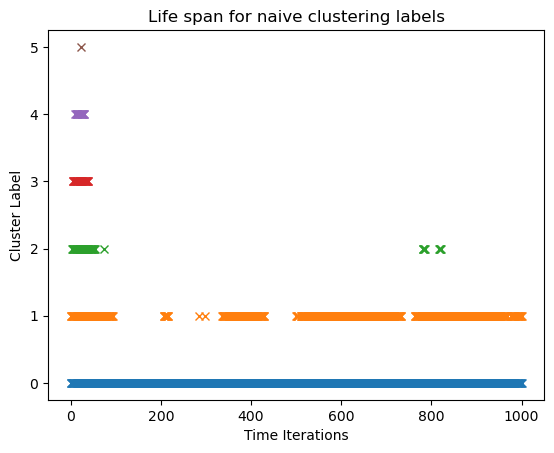

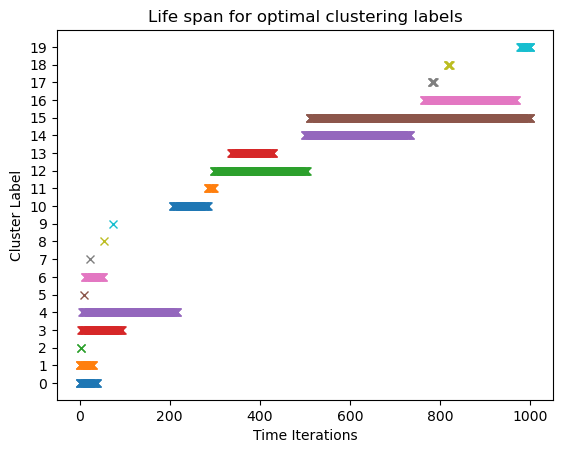

In [11]:
fig, ax = visualisation.plot_cluster_lifespan(df_labels)
ax.set_title("Life span for naive clustering labels")
plt.show()
fig, ax = visualisation.plot_cluster_lifespan(df_optimal)
ax.set_title("Life span for optimal clustering labels")
plt.show()


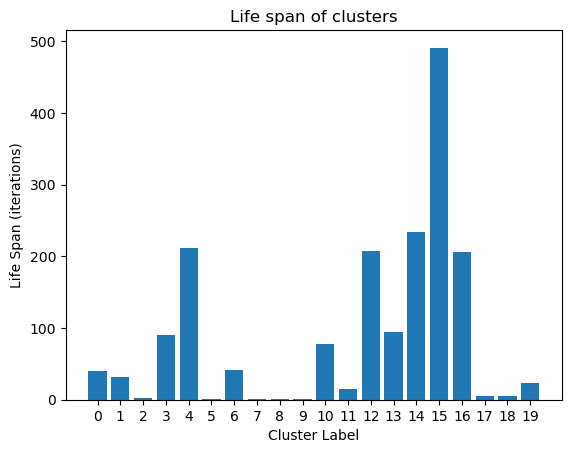

In [12]:
# distribution of life span 
fig, ax = visualisation.barplot_cluster_lifespan(df_optimal)
plt.show()

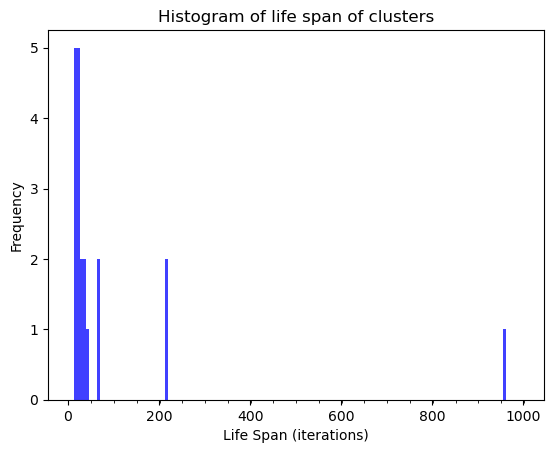

In [13]:
fig, ax = visualisation.plot_life_span_distribution(life_span_all)
plt.show()

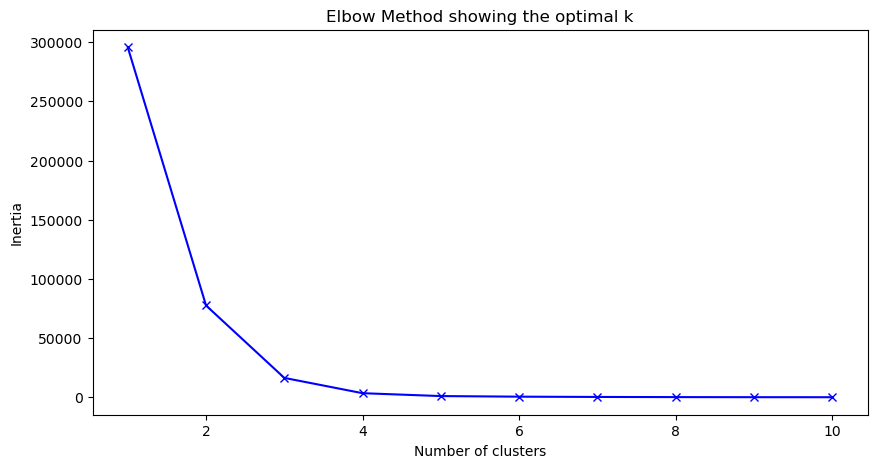

In [14]:
life_span_max, life_span_all = utils.life_span(df_optimal)
fig, ax = visualisation.plot_Kmeans_inertia(life_span_all)
plt.show()

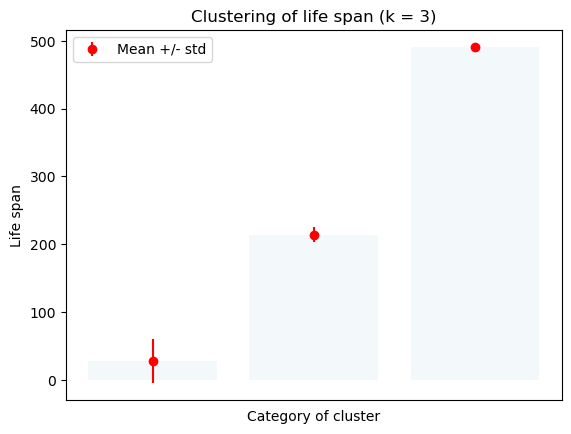

In [15]:

fig, ax = visualisation.plot_categorize_flock(life_span_all, 3)
plt.show()

In [16]:
utils.longer_lasting_cluster(df_optimal)

15

## Birds in cluster 

In [17]:
cluster = utils.longer_lasting_cluster(df_optimal)
cluster

15

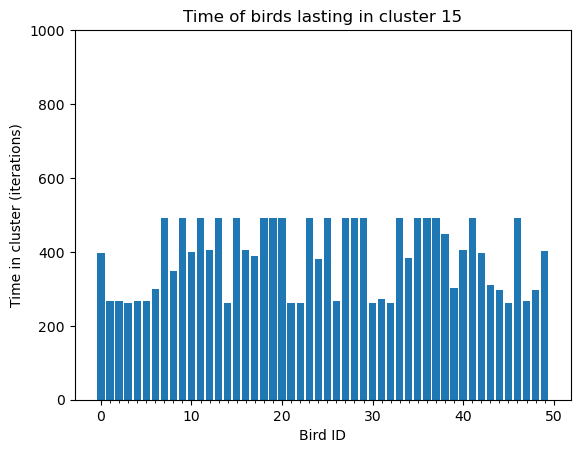

In [18]:

# def barplot_bird_time_in_cluster(df_optimal, cluster):
#     birds_in_cluster = (df_optimal == cluster)
#     bird_cluster_span = birds_in_cluster.astype(int).sum(axis=0).to_numpy()
#     fig, ax = plt.subplots()
#     ax.bar(range(bird_cluster_span.shape[0]), bird_cluster_span)
#     ax.set_xlabel("Bird ID")
#     ax.set_xticks(range(bird_cluster_span.shape[0]), minor=True)
#     ax.set_ylabel("Time in cluster (iterations)")
#     ax.set_ylim(0, df_optimal.shape[0])
#     ax.set_title(f"Time of birds lasting in cluster {cluster}")
#     return fig, ax

fig, ax = visualisation.barplot_bird_time_in_cluster(df_optimal, cluster)
plt.show()

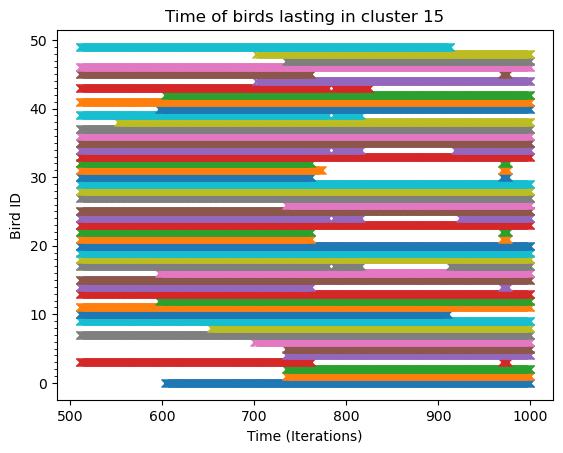

In [19]:
cluster = utils.longer_lasting_cluster(df_optimal)

# def plot_bird_time_in_cluster(df_optimal, cluster):
#     birds_in_cluster = (df_optimal == cluster)
#     # bird_cluster_span = birds_in_cluster.astype(int).sum(axis=0).to_numpy()

#     fig, ax = plt.subplots()
#     for bird in range(df_optimal.shape[1]):
#         mask = birds_in_cluster.iloc[:, bird].to_numpy().astype(bool)
#         x = np.arange(df_optimal.shape[0])[mask]
#         y = np.ones_like(x) * bird
#         ax.plot(x, y, 'x')
#     ax.set(
#         title = f"Time of birds lasting in cluster {cluster}",
#         xlabel = "Time (Iterations)",
#         ylabel = "Bird ID"
#     )
#     ax.set_yticks(range(df_optimal.shape[1]), minor=True)
#     return fig, ax
fig, ax = visualisation.plot_bird_time_in_cluster(df_optimal, cluster)
plt.show()

# Time series Analysis 

## Cluster behaviour - visualisation

In [20]:
flock_orientation = utils.get_flock_orientation(df)   

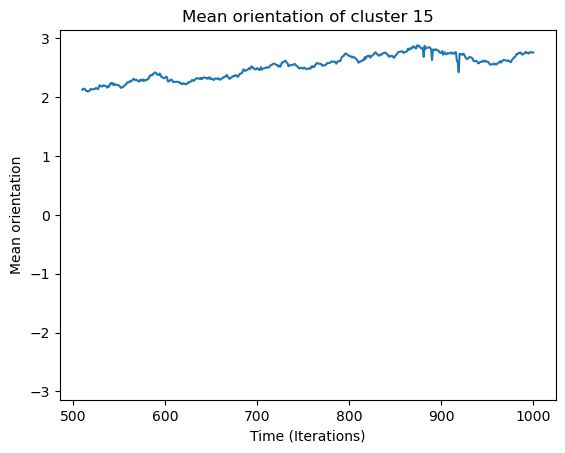

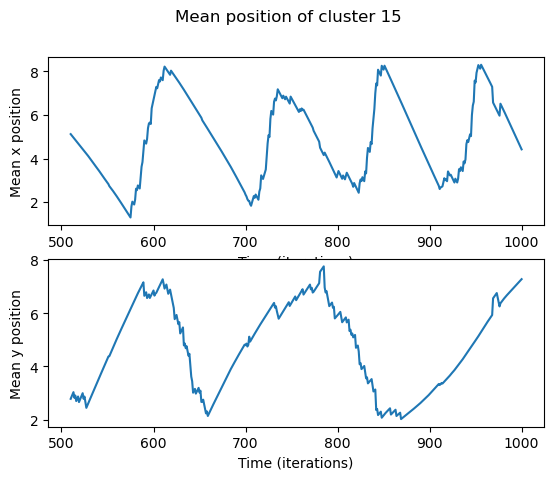

In [21]:
fig, ax = visualisation.plot_cluster_orientation(df, df_optimal, cluster)
plt.show()

fig, ax = visualisation.plot_cluster_position(df, df_optimal, cluster)
plt.show()

## Flock behaviour - Correlation of birds on flock trajectory, on cluster trajectory 

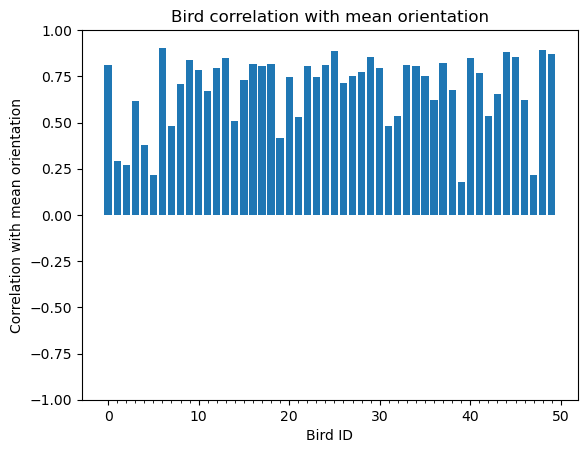

In [22]:
fig, ax = visualisation.plot_bird_correlation_with_mean(df)
plt.show()

## Lag analysis of bird to cluster 

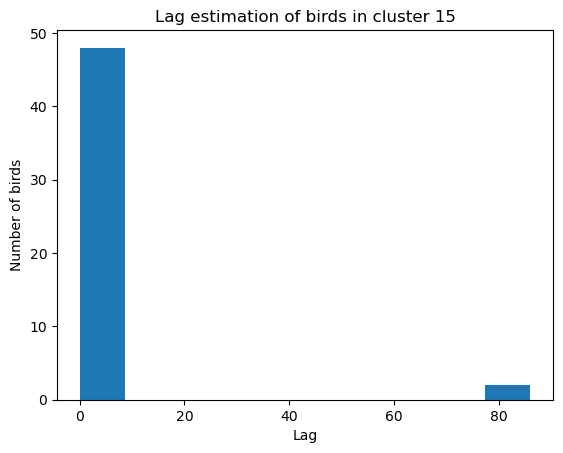

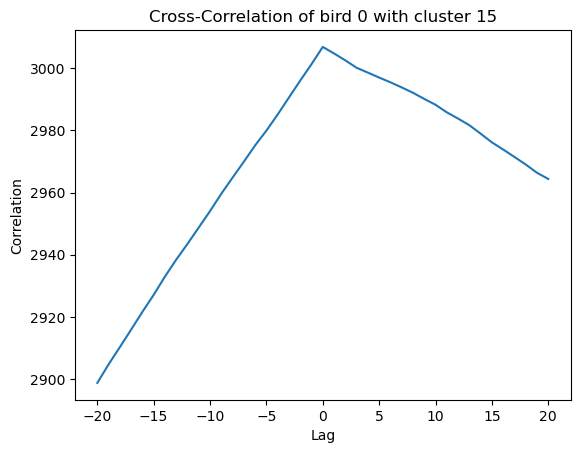

In [23]:
fig, ax = visualisation.plot_cluster_lag_on_mean(df, df_optimal, cluster)
plt.show()

fig, ax = visualisation.plot_cross_correlation(df, df_optimal, cluster, 0, 20)
plt.show()

## Granger Causality analysis 

In [24]:
result_matrix = utils.granger_causality_matrix_flock(df)

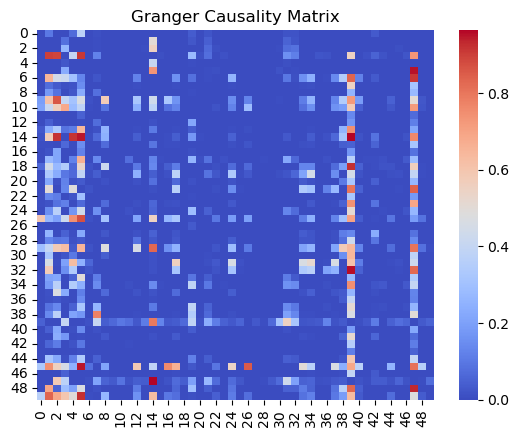

In [25]:
fig, ax = visualisation.heatmap_granger_causality(df)
plt.show()

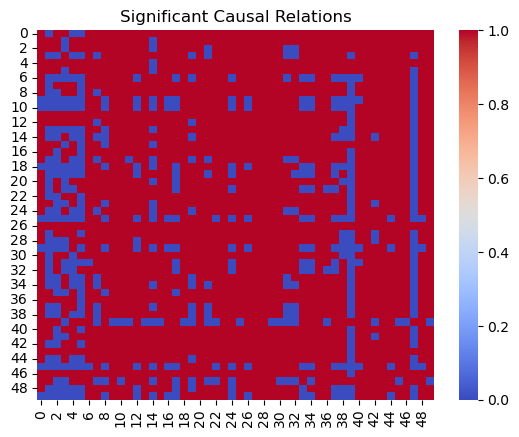

In [26]:
fig, ax = visualisation.heatmap_granger_causality_significant(df)
plt.show()

Calculating Granger Causality Matrix...
The bird that has the most influence : 20
It influences 50 other series.
Plotting...


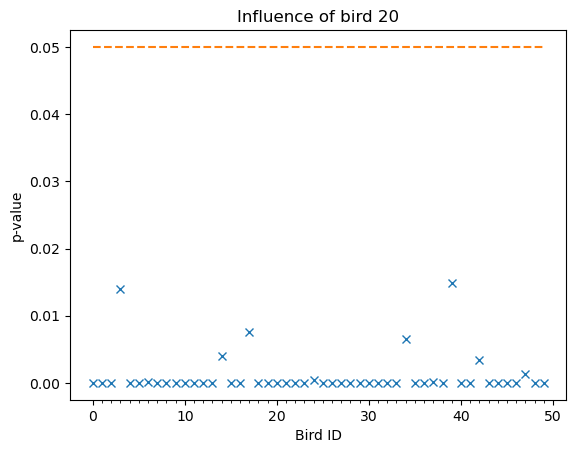

In [27]:
fig, ax = visualisation.plot_most_influent(df)
plt.show()

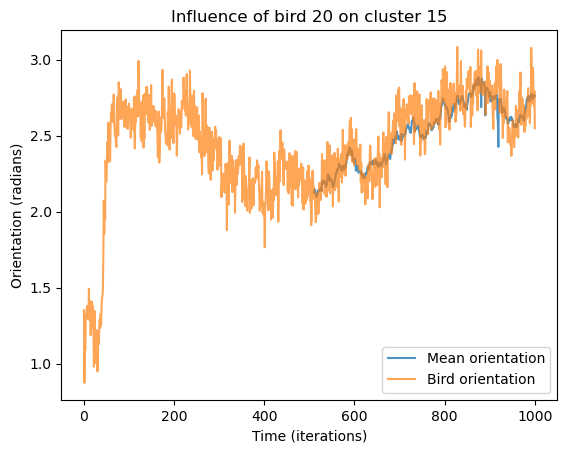

In [28]:
fig, ax = visualisation.plot_most_influent_bird(df, df_optimal, cluster) 
plt.show()

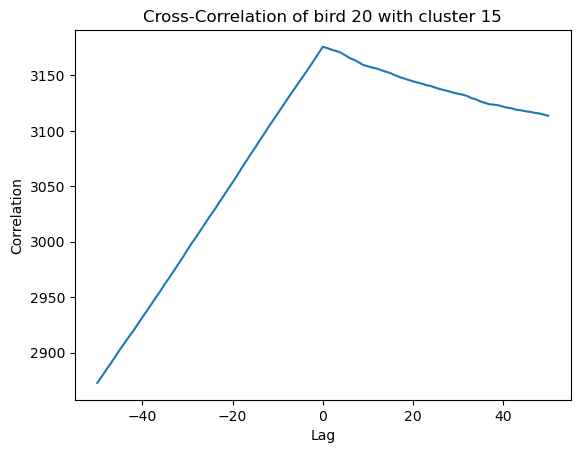

In [29]:
fig, ax = visualisation.plot_cross_correlation_most_influential_bird(df, df_optimal, cluster)

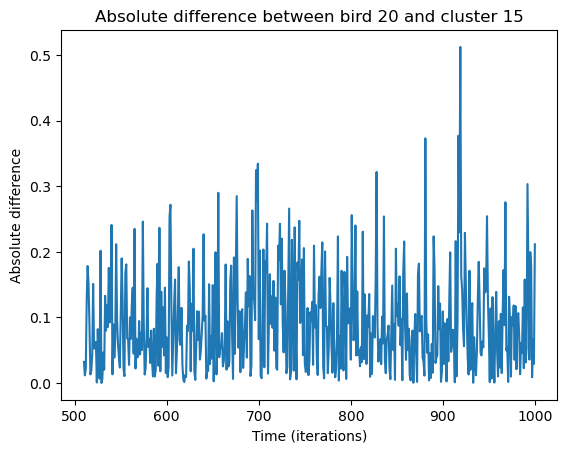

In [30]:
fig, ax = visualisation.plot_bird_difference_with_cluster(df, df_optimal, cluster)

## Granger Causality on the mean orientation of the flock 

In [31]:
flock_orientation = utils.get_flock_orientation(df)

causal_relation_with_mean = utils.granger_causality_mean(pd.DataFrame(np.nan_to_num(flock_orientation)), max_lag=10)


Significant birds: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49]
Least significant birds: [44]
98.0% of birds have a significant influence on the mean orientation.


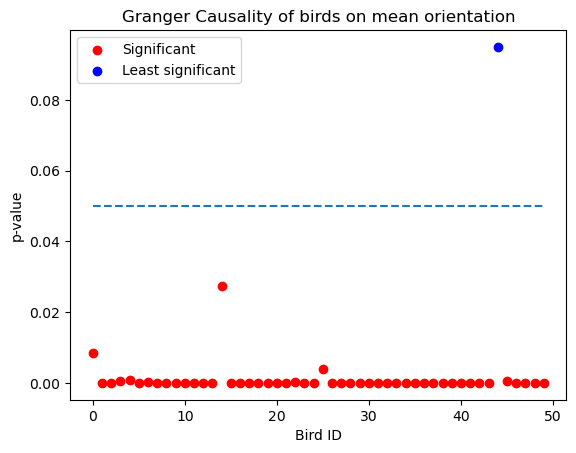

In [32]:
fig, ax = visualisation.plot_bird_causality_with_mean(df)


## Lag Analysis - Lag on bird trajectories 

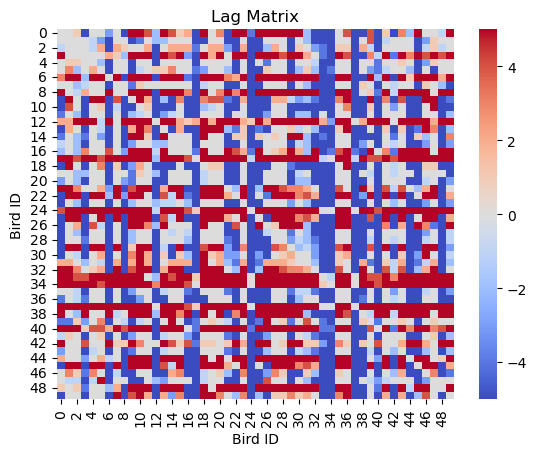

In [33]:
fig, ax = visualisation.heatmap_lag_matrix(df)
plt.show()

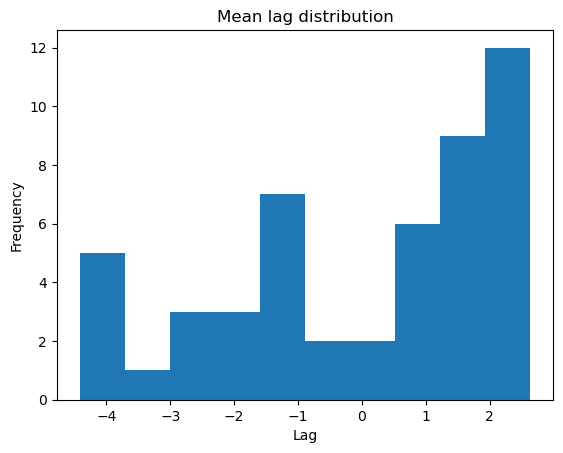

In [34]:
fig, ax = visualisation.hist_lag_matrix(df)
plt.show()

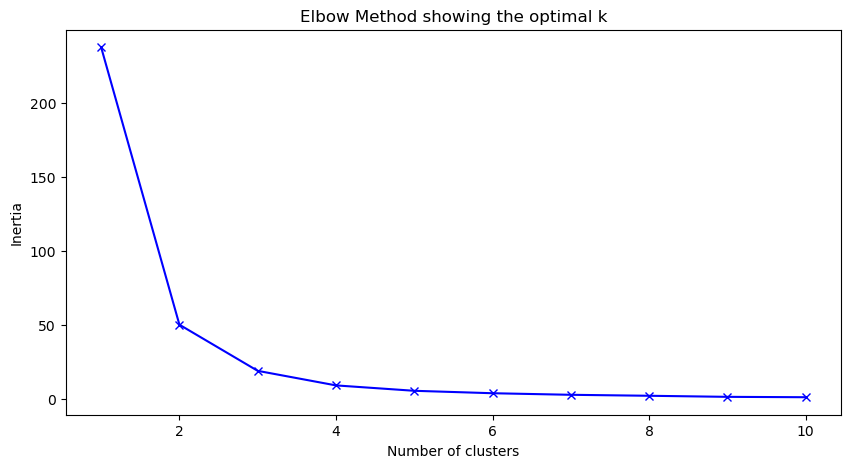

In [35]:
df_lag = pd.DataFrame(utils.compute_lag_matrix(df))
visualisation.plot_Kmeans_inertia(df_lag.mean().to_numpy().reshape(-1, 1))
plt.show()